# Week 3: Graphics, K-Nearest Neighbors, and Regression

This week we will learn more about how to make graphics in python using matplotlib as well as how to set up, fit, and interpret some basic machine learning models. 


## Graphics with matplotlib(.pylot)

In this class we will use the matplotlib library to generate our graphics. If you have installed Anaconda, matplotlib should be installed already. Otherwise, you may have to run "pip install matplotlib" in your terminal to install matplotlib. 

In the lines below, we load in some basic libraries that we will be using. Once again, we will use the "seaborn" library to import the iris dataset. Otherwise, you will be able to find the csv file 'iris.csv' on the GitHub repo, and load that.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #Only should need the pyplot sublibrary
import seaborn as sns #If you don't have this, just load the csv 

iris = sns.load_dataset('iris')
# iris = pd.read_csv('iris.csv')
iris.head()


### Scatter Plots

We will go over a couple types of plots that we can make in matplotlib, as well as various ways we can customize these plots (add labels, legends, change colors, etc. ).

The first type of plot we will go over is the scatter plot. To make a scatterplot in matplotlib, we will use the command `plt.scatter`. The basic syntax looks like this

> `plt.scatter(x-vector, y-vector, color = "color", label = "label")`

where x-vector and y-vector are what you want on your x-axis and y-axis, respectively. In this case, we will graph sepal length against sepal width. In order to add x-labels, and y-labels we will use the commands:

> `plt.xlabel("x label text")`; `plt.ylabel("y label text")`

And to add an overall title we will use the command 

> `plt.title("Plot Title")`

Finally, we can add a legend using the command 

> `plt.legend(loc = "best or (upper/lower) (right/left/center)")

This command will create a legend using the labels we defined above. Right now, this isn't very useful, since our plot only contains one thing. However, as we start to have composite plots, this will be more useful. 

NOTE: Below, I've assigned each of these commands to variables. This just suppresses some output like `<matplotlib.legend.Legend at 0x7fd99eb1db90>` from being displayed with the plot. Doing this is not necessary, however. 


In [ ]:
sepal_length = iris.sepal_length
sepal_width = iris.sepal_width

#This first command just makes the graphs larger
a = plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k') 
a = plt.scatter(sepal_length, sepal_width, color = "blue", label = "sepal")
a = plt.title("Sepal Length vs. Sepal Width")
a = plt.xlabel("Sepal Length")
a = plt.ylabel("Sepal Width")
a = plt.legend(loc="best") 


We can also stack plots on top of each other. We do this very simply, by putting adding another plot command. We can give this plot a different color and add a label so that we'll be able to differentiate the two plots using the legend. 

Finally, when we are done, we can save our plot using the command
> `plt.savefig("path/to/file.png")`

In the example below, we will add petal length and petal width to our plot. 



In [ ]:
petal_length = iris.petal_length
petal_width = iris.petal_width

#This first command just makes the graphs larger
a = plt.figure(num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='k') 
a = plt.scatter(sepal_length, sepal_width, color = "blue", label = "sepal")
a = plt.scatter(petal_length, petal_width, color = "red", label = "petal")
a = plt.title("Petal and Sepal Length vs. Sepal Width")
a = plt.xlabel("Length")
a = plt.ylabel("Width")
a = plt.legend(loc="best") 
a = plt.savefig("petal_sepal_scatter.png")



### Bar Plots

We can also use matplotlib to make bar plots. To do so, we use the `plt.bar` function, whose argument is described below:
 > `plt.bar(x-coordinates, bar-heights, width = bar-width, color = "color", label = "label")`

 By default, if you do not specify values fir these options, matplotlib will set the bar width to be 0.8 and set the color automatically.

 The x-coordinates command will become more important later on as we will try to plot more advanced side by side type bar charts. For now, we can generally set the x-coordinates using the command `np.arange(number-of-bars)`. This creates a list like (0,1,2,..), which will essentially tell matplotlib to put the barplots spaced 1 "unit" apart, starting at the left at 0. 

Once we have a bar chart, we may want to label the x-ticks so that we know what each bar refers to. To do so we will use the `plt.xticks` function, whose syntax is described:

> `plt.xticks(tick-locations, tick-labels)`

The tick-locations will tell us where to put tick-labels. Both tick-locations and tick-labels should be vectors/lists and should have the same number of elements as the number of bars. Typically, if you are just graphing one bar plot, you can just set tick-locations equal to the x-coordinates from your bar-chart. If you don't like the way this looks, you can always play around with this argument, adding or substracting from the tick-locations vector to move the ticks left or right.


 To illustrate all this, we will make a bar chart of the average sepal length for each species. First, we will need to generate a vector that has the average heights for each species. First, we find the types of species in the data. We can generate this by running
 
 > `iris.species.unique()`

This will give us the different unique values in the column iris.species. After running this command we will find that the unique species are "setosa", "versicolor" and "virginica". We can then divide up the `iris` dataset into three datasets by species. To do so we run the following commands:

> setosa = iris[iris['species'] == 'setosa'] 

> versicolor = iris[iris['species'] == 'versicolor']

> virginica = iris[iris['species'] == 'virginica']

Once we do this we can generate a vector of the sepal lengths for each species and pass this on to the height argument of our `plt.bar` function. I put this all together below:





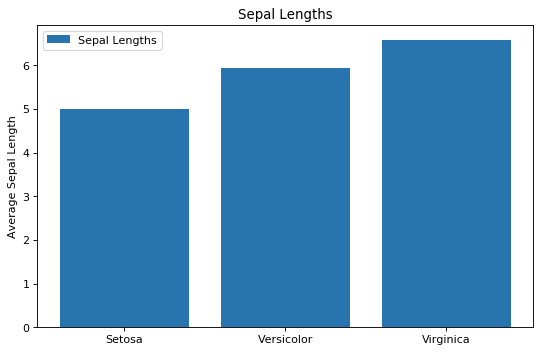

In [69]:
# Get the unique values
iris.species.unique()

# Divide iris into three dataframes, one for each species
setosa = iris[iris['species'] == 'setosa'] 
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

# Get the average sepal length for each species
setosa_sepal_length = np.mean(setosa.sepal_length)
versicolor_sepal_length = np.mean(versicolor.sepal_length)
virginica_sepal_length = np.mean(virginica.sepal_length)

# Put the average sepal lengths into a vector
sepal_lengths = np.array([setosa_sepal_length,versicolor_sepal_length,virginica_sepal_length])

# Set up the x-coordinates for the bar chart. 
## Use np.arange(3) since we will be plotting 3 bars, one for each species
sepal_loc = np.arange(3)

# Set up the x-tick labels
species_ticks = np.array(["Setosa", "Versicolor", "Virginica"])

# Set Color to UCLA blue
ucla_blue = "#2774AE"

# Now plot the bar plot, first line as before just makes things larger
## Variable assignment is optional, just supress some output. 
a = plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
a = plt.bar(sepal_loc, sepal_lengths, color = ucla_blue, label = "Sepal Lengths")
a = plt.xticks(sepal_loc, species_ticks)
a = plt.title("Sepal Lengths")
a = plt.ylabel("Average Sepal Length")
a = plt.legend(loc = "best")


As we did with the scatter plots, we can also use matplotlib to plot a side-by-side bar plot. For example, below, for each species we will put the average petal and sepal lengths next to each other for each species. 

For the most part, this follows the same process as adding another scatter plot on top of an existing one; we will simply add an additional `plt.bar` command under the first one. The main thing that we need to make sure we modify in the two`plt.bar` commands, apart from the vector of of bar heights, is the vector of x-locations. If we we the same x-locations as the first bar, matplotlib will simply put the second bar chart directly on top of the first bar. Further, we will want to space out the x-locations in the first bar chart to leave room for the second set of bars.

For the example, we will also need to generate a vector of average petal lengths. This is done in the code below:

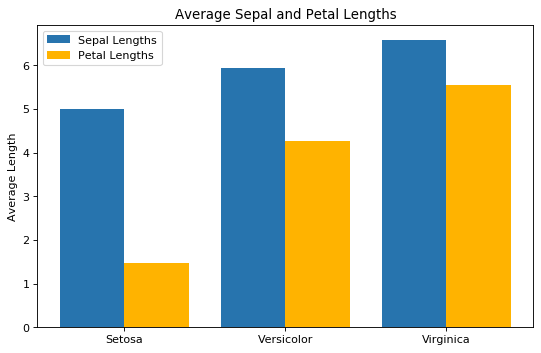

In [68]:
# Start off by generating the avergae petal lengths for each species
setosa_petal_length = np.mean(setosa.petal_length)
versicolor_petal_length = np.mean(versicolor.petal_length)
virginica_petal_length = np.mean(virginica.petal_length)

# Put these all together in a vector
petal_lengths = np.array([setosa_petal_length, versicolor_petal_length, virginica_petal_length])

# Generate the x-locations for the sepals, leaving space for the petals
sepal_loc = 2*np.arange(3)

# Genrate the x-lovations for the petals.
## We can do this by modifying the x-locations for the petals
## Add 0.8 because this is the default bar-width
petal_loc = sepal_loc + 0.8

# Generate where the x-ticks will be put
## We may want them in between the two bars:
combined_ticks = sepal_loc + 0.4

# Set up the x-tick labels
species_ticks = np.array(["Setosa", "Versicolor", "Virginica"])

# Add UCLA Blue and Gold Colors
ucla_blue = "#2774AE"
ucla_gold = "#FFB300"

# Ready to plot
a = plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
a = plt.bar(sepal_loc, sepal_lengths, color = ucla_blue, label = "Sepal Lengths")
a = plt.bar(petal_loc, petal_lengths, color = ucla_gold, label = "Petal Lengths" )
a = plt.xticks(combined_ticks, species_ticks)
a = plt.title("Average Sepal and Petal Lengths")
a = plt.ylabel("Average Length")
a = plt.legend(loc = "best")
a = plt.savefig("petal_sepal_bar.png")


### Plotting Functions using matplotlib

Finally, we will quickly go over how to plot functions in matplotlib. To do so, we will use the `plt.plot` function, which takes in x-coordinates, y-coordinates, and plots then by drawing lines between the coordinates like the following 
$$ (x_1, y_1) \rightarrow (x_2, y_2) \rightarrow (x_3, y_3) \dots \rightarrow (x_n , y_n) $$

This is useful for plotting functions. If we want to plot a function $f(x)$, over a domain $(a,b)$, we can do so in matplotlib by:

1. Using the command `x = np.arange(a,b,step)` to generate points equally spaced by the `step` between a and b. In other words, this generates: a, a + step, a + 2*step, ..., all the way to b.
2. Applying the function to the x-values to generate the y-values. Something like `y = f(x)`, where the exact value of `f` depends on what function you are using. 
3. Plot x against y using `plt.plot(x,y, color = "color", label = "label")

From there we can add a labels, a legend, and a title just as before. To illustrate I graph exponential vs. quadratic vs. logistic growth on the domain (1,7). 


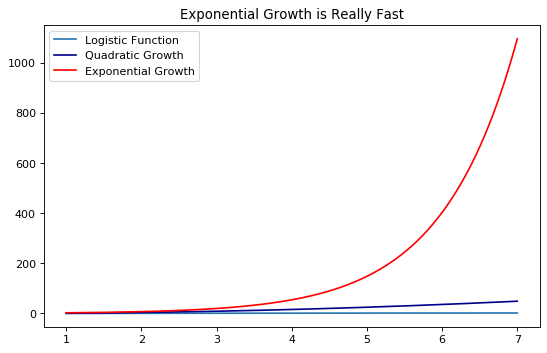

In [80]:
# Generate the x-values
## When you are plotting a function it is good to have a lot of points
## This way the individual lines between each point approximate a curve
x = np.arange(1,7,0.001)

# Generate the "y" values
lnx = np.log(x)
x2 = x**2
expx = np.exp(x)

# Plot the functions
a = plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
a = plt.plot(x, lnx, color = ucla_blue, label = "Logistic Function")
a = plt.plot(x, x2, color = "darkblue", label = "Quadratic Growth")
a = plt.plot(x, expx, color = "red", label = "Exponential Growth")
a = plt.title("Exponential Growth is Really Fast")
a = plt.legend(loc = "best")
a = plt.savefig("exp_is_fast.png")



This concludes our discussion of matplotlib. Needless to say, there's a lot more that you can do with matplotlib. There are a lot of resources online that can help you through basically anything you could need to do with matplotlib. It does take a bit of reading though, so don't worry if it takes some time to get up to speed.

## Machine Learning: K-Nearest Neighbors

Now, we will start reviewing our first machine learning technique, K-nearest neighbors. Along the way, we will review some other practical concepts, like training vs. testing sample splitting. 


### What is K-Nearest Neighbors?

K-Nearest Neighbors is a classification algorithm. This means that we are going to use some input characteristics or featurs to predict the class or catogory that our point lies in. For example, in the iris dataset we may want to use sepal length, sepal width, petal length, and petal width, to make a prediction about the species of the flower that we are looking at (we are "classifying" the flower).

In order to help us figure out how to make this classification we have some training data. This is a set of observations for which we already know the sepal and petal characteristics *as well as* the species. 

K-nearest neighbors will use the training to make a prediction on a set of sepal and petal charactersitcs via the following algorithim:

1. For a new observation of (sepal length, sepal width, petal length, petal width), K-nearest neighbors will look in the training data for the K points that are closest (in Euclidean Distance) to this new observation.

2. After finding the K closest points, K-nearest neighbors will make a prediction about the species of the new point by looking at the most common species in the K-nearest neighbor. For example, if 75% of the k-nearest points are of the "setosa" species, K-nearest neighbors will classify the new point as a "setosa" flower.

#### How do I choose K?
The algorithim above is straightfoward, but it does not give any guidance on how to choose K, the number of neighbors the algorithm will look at. If you choose a K that is too small, then your prediction could be innacurate because there are not enough data points that you are using to make a prediction. However, if you choose a K that is too large then you will converge to just always predicting the most common species in the data, which will not take into account the information you have with the sepal and petal characteristics.

In practice, we will want to try a few different K values and see which one does the best. To test various values of K, we will split our sample into a training set and a testing set. We can then fit KNN models for various values of K on our training set and evaluate their performance on our testing set. We can evaluate the performance of the model by seeing what percentage of the testing set is correctly classified. This process is called cross-validation.

It is very important to split up our data and use separate sets to train and test our model. If we test our model on the same dataset that we use to train it, we will always get that smaller values of K give us better fit. For example, K=1 will just return the species of the data point itself, which will always be accurate. 

In general, these high level parameters that govern model complexity and strucutre will be reffered to as *hyperparameters*, and will generally be chosen by some cross-validation procedure.


### Fitting K-Nearest Neighbors
Now we will go over the procedure to fit a K-Nearest Neighbors Model in python. To do so, we will use the `diamonds` dataset from seaborn. We will use the carat, depth, and price of a diamond to classify the cut.

First we will split the data. To do so, we import the the function `train_test_split` from the library `sklearn.model_selection`. This function takes in two arrays, an array of features (X array) and an array of outcomes (Y array) and returns four arrays: an X training array, an X testing array, a Y training array, and a Y testing array.

The syntax is provided below:

> X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0-1)

By default, test_size will be set to 0.25. We use this command to making testing and training datasets below:




In [95]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Load in the data and split into features (X) and target (Y)
diamonds = sns.load_dataset('diamonds')[['cut','carat','depth','price']]
diamonds_X = diamonds[['carat','depth','price']]
diamonds_Y = diamonds['cut']

# Create training and testing datasets.
X_train, X_test, Y_train, Y_test = train_test_split(diamonds_X, diamonds_Y, random_state = 0)



Now that we have training and testing datasets, we are ready to fit the K-Nearest neighbor model. To do so, we will import the KNeighborsClassifier model from the library `sklearn.neighbors` via the command:

> `from sklearn.neighbors import KNeighborsClassifier`

From there, we initialize our model via the command

> `model_name = KNeighborsClassifier(n_neighbors = k)`

For this example, we will start by taking k = 10. We fit our model via the method:

> `model_name.fit(X_train, Y_train)`

Demonstrated below:


In [96]:
# Import the Model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model:
diamonds_knn = KNeighborsClassifier(n_neighbors = 10)

# Fit the model

diamonds_knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Making Predictions and Evaluating K-Nearest Neighbors

To make predictions we need to pass our model an array of X (or feature) values. We can then use the `model_name.predict(X_new)` method on our fitted model to outpur some predicted target or y values.

In the example we will use our fitted model to make predictions about two data points that we will give below:


In [100]:
# Set up the new X-array that we want to make predictions on:
X_new = np.array([[0.20, 43.00, 326],[1.04,62.50,5324.25]])

# Call the predict method to make predictions
predictions = diamonds_knn.predict(X_new)

# Print the predictions
print(predictions)

['Good' 'Ideal']


We can use this method to evaluate the model by using the predict method to make predictions on our entire testing dataset. We can then check how often the predicted value mathes the true value by running the commands 

> predictions = model_name.predict(X_test)

> accuracy = np.mean(predicted == testing)

The vector (predicted == testing) is one when the two values are the same and 0 otherwise. Taking the average will give us the percentage of the time this model correctly classifies the cut of the diamond:

In [104]:
predicted = diamonds_knn.predict(X_test)
accuracy = np.mean(predicted == Y_test)
print(accuracy)

0.4324805339265851


We can see that our model only gives us an accurate prediction ~43% of the time. Probably we should go back and try out different values of K to see if we get a better prediction.

## Predicting a Continuous Outcome: Linear Regression

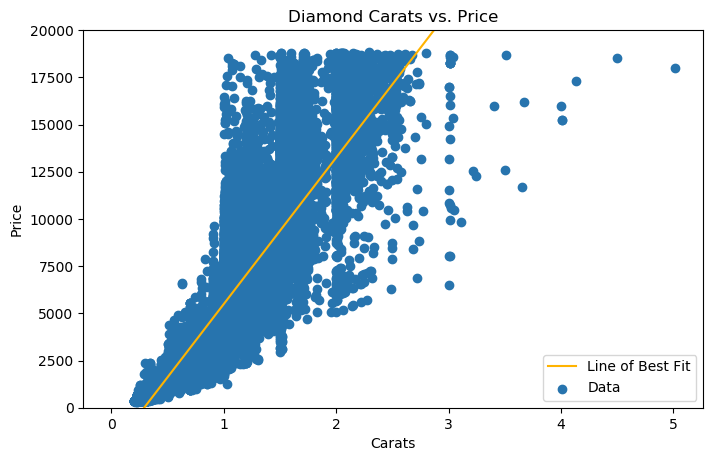

In [116]:
# A motivating example

x = np.arange(0,5,1)
y = -2256.36 + 7756.42*x

a = plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k') 
a = plt.scatter(diamonds.carat, diamonds.price, color = ucla_blue, label = "Data")
a = plt.plot(x,y, color = ucla_gold, label = "Line of Best Fit")
a = plt.legend(loc = "best")
a = plt.ylim(0,20000)
a = plt.title("Diamond Carats vs. Price")
a = plt.xlabel("Carats")
a = plt.ylabel("Price")


### What is Linear Regression? 

In the K-Nearest Neighbors framework, we were interested in using some continuous input variables to predice a discrete or categorical outcome; in our case, the cut of the diamond. In contrast, in linear regression (and regression more generally), we are interested in using our explantory/feature/X variables to predict a *continuous* outcome variable, usually denoted Y.  

The most natural way to do this is to try to come up with a "line of best fit" between our explanatory variables and our outcome variables. That is, if I am using a set of $p$ explanatory variables $X_1, X_2, \dots, X_p$ to predict my outcome, $Y$, I want to select the coordinates $\beta_0, \beta_1, \dots, \beta_p$ such that the line: 

$$ \beta_0 + \beta_1X_1 + \beta_2 X_2 + \dots + \beta_p X_p $$

is closest to $Y$ on average. Formally, this means I choose my coeffecients to minimize the sum of squared errors between my $Y$ coordinates and my line:

$$ \beta_0, \beta_1, \dots, \beta_p = \arg\min_{b_0, \dots, b_p} \frac{1}{n}\sum_{i=1}^n\left(Y_i - b_0 - b_1 X_{1,i} - \dots - b_p X_{p,i}\right)^2 $$

Where $n$ is my number of observations and $i$ denotes a specific observation. 

Typically, so long as $p < n$ and none of our features/explanatory variables are linear combinations of other variables, we will always be able to find coeffecients that solve the above minimization problem. Furthermore, solving this minimization is relatively fast (complexity ~ $O(n^{2.3})$).

To find the coeffecients of this model, we can use the LinearRegression model in the library `sklearn.linear_model`. The process is very similar to before. After loading our data and generating training and testing datasets, to initialize the model, we run:

> `model_name = LinearRegression()`

Next we fit this model with our training data:

> `model_name.fit(X_train, Y_train)`

If we are interested then, we can take a look at our coeffecients and intercepts by calling the attributes:

> `model_name.coef_`, `model_name.intercept_`

We demonstrate below by using the same Diamond dataset as beforw. In this example we will use the carat and depth of a diamond to predict the price. 

In [127]:
# First we import the Linear Regression Model:
from sklearn.linear_model import LinearRegression

# Now set up and split up the data:
diamonds_regX = diamonds[['carat', 'depth']]
diamonds_regY = diamonds[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(diamonds_regX, diamonds_regY, random_state = 0)

# Set up the linear regression model and fit it
diamonds_reg = LinearRegression()
diamonds_reg.fit(X_train, Y_train)

# Look at the coeffecients of the model:
print("Carat Coeffecient: ", diamonds_reg.coef_[0][0])
print("Depth Coeffecient: ", diamonds_reg.coef_[0][1])
print("Intercept: ", diamonds_reg.intercept_[0])


Carat Coeffecient:  7753.834079773393
Depth Coeffecient:  -100.6321673019607
Intercept:  3958.5077429174275


### Prediction and Evaluation of the Linear Regresison Model

From the results above, we see that our fitted regression model looks something like:
$$\text{price} = 3958.5 + 7753.8 \cdot \text{carat} - 100.6\cdot\text{dept}$$

Using the testing dataset and the predict method on our model, we can evaluate how well this model is doing. To make predictions on a set of new $X$ values (as before), we use the method 

> `predictions = model_name.predict(X_new)`

We give an example below:


In [141]:
# Set up the new X-array
X_new = np.array([[0.400, 61.0],[0.700,61.8]])

# Make predictions using our fitted model
predictions = diamonds_reg.predict(X_new)
print("First Prediction: ",predictions[0][0])
print("Second Prediction: ", predictions[1][0])

# Verify that our predictions are similar to what we'd expect by using the coeffecients/intercept

p1 = diamonds_reg.intercept_[0] + diamonds_reg.coef_[0][0]*0.400 + diamonds_reg.coef_[0][1]*61.0 
p2 = diamonds_reg.intercept_[0] + diamonds_reg.coef_[0][0]*0.700 + diamonds_reg.coef_[0][1]*61.8 
print("\n")
print("First Verification: ", p1)
print("Second Verification: ", p2)



First Prediction:  921.4791694071819
Second Prediction:  3167.1236594976313


First Verification:  921.4791694071819
Second Verification:  3167.123659497631


Using the predict method and our testing dataset, we can get a sense of how well our model is preforming. To do so, we calculate the out of sample $R^2$. If we let $\hat{Y}_i$ denote the predicted $Y$ value and $\bar{Y}$ denote the mean of $Y$, the $R^2$ is given by:

$$ R^2 = 1 - \frac{\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^n(Y_i - \bar{Y})^2} $$

The $R^2$ is (beyond a sort of edge case where you force the intercept to be some value), bounded between 0 and 1 and can be interpreted as the share of variance in $Y$ explained by our linear model. Typically we want values of $R^2$ that are closer to $1$.

We calcualte the $R^2$ on our testing data by generating the $\hat{Y}$ values with the predict function. 


In [150]:
# Generate Y hat using the predict method
Yhat = diamonds_reg.predict(X_test)

# Generate the other terms neaded to calculate R^2
Ybar = np.mean(Y_test)
numerator = np.sum( (Y_test - Yhat)**2 )
denominator = np.sum( (Y_test - Ybar)**2 )

# Generate the R^2
diamonds_R2 = float(1 - (numerator/denominator))
print("Out of Sample R^2: ", diamonds_R2)


Out of Sample R^2:  0.8520624902682112


Our out of sample $R^2$ here is ~0.85! This suggests that our simple linear model relating carats and depth to price can explain 85% of the variance in price.

As a note, $R^2$ is definetly not a perfect way to evaluate model fit, and later on in the course we may go over more other ways to evaluate model fit. However, it is nice in that it is easy to calculate and understand.